In [17]:
import io
import re
import string
import tqdm
import os
import pandas as pd
import numpy as np
import string
from nltk.corpus import stopwords
from nltk import Text
import matplotlib.pyplot as plt

from music21 import *

np.random.seed(42)

In [2]:
def transpose_notes(notes):
    midi_stream = stream.Stream(notes)
    ori_key = midi_stream.analyze('key')
    k_interval = interval.Interval(ori_key.tonic, key.Key('C').tonic)
    new_stream = midi_stream.transpose(k_interval)
    return new_stream

def softmax(vec):
    return np.exp(vec) / np.exp(vec).sum()

In [7]:
file_list = os.listdir(r"./scores/beethoven")
mxl_file_list = [file for file in file_list if '.mxl' in file]

beethoven_list = []

In [10]:
for mxl_file in mxl_file_list:
    beethoven = converter.parse(f'./scores/beethoven/{mxl_file}')
    if 'major' in str(beethoven.analyze('key')):
        sb = beethoven.getElementsByClass('Part')
        for part in sb:
            if 'Violin' in str(part):
                sp_ind = [str(soprano) for soprano in sb].index(str(part))
                sp = sb[sp_ind]
                tn = transpose_notes(sp)
                note_list = [(str(notes.pitches)[22:-3],notes.beat) for notes in tn.recurse().notes if 'music' not in str(notes.pitches)[22:-3]]
                beethoven_list.append(note_list)

C:\Users\Park Seongmin\AppData\Roaming\Python\Python310\site-packages\music21\musicxml\xmlToM21.py:4700: MusicXMLWarning: Cannot find voice '4'; putting outside of voices.
  warnings.warn(
C:\Users\Park Seongmin\AppData\Roaming\Python\Python310\site-packages\music21\musicxml\xmlToM21.py:4703: MusicXMLWarning: Current voiceIds: ['1', '2', '3']
  warnings.warn(
C:\Users\Park Seongmin\AppData\Roaming\Python\Python310\site-packages\music21\musicxml\xmlToM21.py:4706: MusicXMLWarning: Current voices: [<music21.stream.Voice 1>, <music21.stream.Voice 2>, <music21.stream.Voice 3>] in m. 143
  warnings.warn(


In [13]:
note_vertex, index = {}, 0  # start indexing from 1
for i in range(len(beethoven_list)):
    for beethoven_note in beethoven_list[i]:
        if beethoven_note not in note_vertex:
            note_vertex[beethoven_note] = index
            index += 1
vertex_size = len(note_vertex)
print(len(note_vertex))

1642


In [14]:
beethoven_list_total = []
for i in range(len(beethoven_list)):
    for j in range(len(beethoven_list[i])):
        beethoven_list_total.append(beethoven_list[i][j])
len(beethoven_list_total)

23703

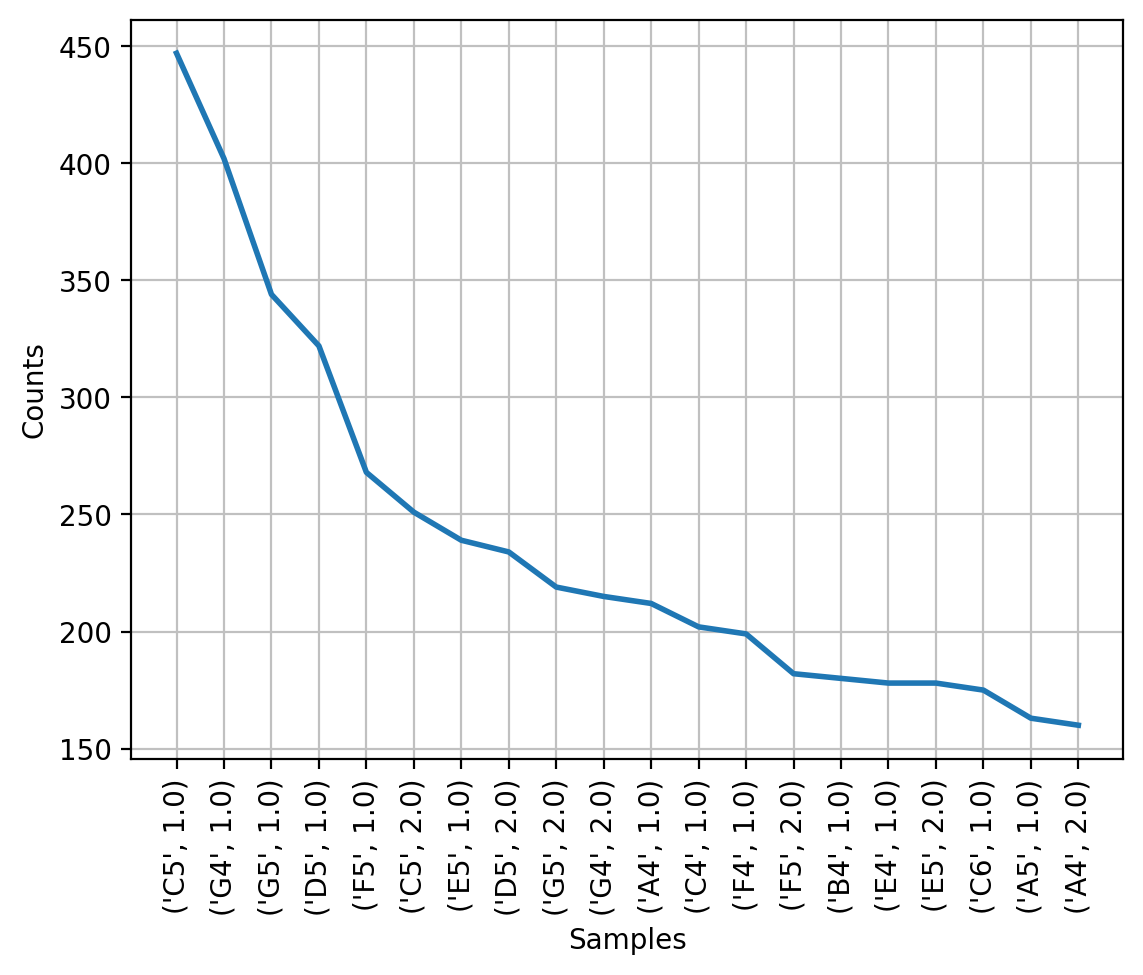

In [15]:
text = Text(beethoven_list_total)
text.plot(20)
plt.show()

In [19]:
str_note_vertex = [str(note_v) for note_v in note_vertex]
df = pd.DataFrame(0, index=str_note_vertex, columns=str_note_vertex)
for i in range(len(beethoven_list)):
    for j in range(len(beethoven_list[i])-1):
        df.loc[str(beethoven_list[i][j]),str(beethoven_list[i][j+1])] += 1
df = df.sort_index()
df = df.reindex(sorted(df.columns), axis=1)
df.head()

('A#3', 1.0)  ('A#3', 1.5)  ('A#3', 2.0)  \
('A#3', 1.0)                         0             0             0   
('A#3', 1.5)                         0             0             0   
('A#3', 2.0)                         0             0             0   
('A#3', Fraction(11, 6))             0             0             0   
('A#3', Fraction(4, 3))              0             0             0   

                          ('A#3', Fraction(11, 6))  ('A#3', Fraction(4, 3))  \
('A#3', 1.0)                                     0                        0   
('A#3', 1.5)                                     0                        0   
('A#3', 2.0)                                     0                        0   
('A#3', Fraction(11, 6))                         0                        0   
('A#3', Fraction(4, 3))                          0                        0   

                          ('A#3', Fraction(5, 3))  ('A#4', 1.0)  ('A#4', 1.5)  \
('A#3', 1.0)                                    0             0             0   
('A#3', 1.5)                                    0             0             0   
('A#3', 2.0)                                    0             0             0   
('A#3', Fraction(11, 6))                        0             0             0   
('A#3', Fraction(4, 3))                         0             0             0   

                          ('A#4', 2.0)  ('A#4', 2.25)  ...  ('G6', 4.0)  \
('A#3', 1.0)                         0              0  ...            0   
('A#3', 1.5)                         0              0  ...            0   
('A#3', 2.0)                         0              0  ...            0   
('A#3', Fraction(11, 6))             0              0  ...            0   
('A#3', Fraction(4, 3))              0              0  ...            0   

                          ('G6', 4.3330078125)  ('G6', Fraction(10, 3))  \
('A#3', 1.0)                                 0                        0   
('A#3', 1.5)                                 0                        0   
('A#3', 2.0)                                 0                        0   
('A#3', Fraction(11, 6))                     0                        0   
('A#3', Fraction(4, 3))                      0                        0   

                          ('G6', Fraction(11, 3))  ('G6', Fraction(13, 3))  \
('A#3', 1.0)                                    0                        0   
('A#3', 1.5)                                    0                        0   
('A#3', 2.0)                                    0                        0   
('A#3', Fraction(11, 6))                        0                        0   
('A#3', Fraction(4, 3))                         0                        0   

                          ('G6', Fraction(14, 3))  ('G6', Fraction(4, 3))  \
('A#3', 1.0)                                    0                       0   
('A#3', 1.5)                                    0                       0   
('A#3', 2.0)                                    0                       0   
('A#3', Fraction(11, 6))                        0                       0   
('A#3', Fraction(4, 3))                         0                       0   

                          ('G6', Fraction(5, 3))  ('G6', Fraction(7, 3))  \
('A#3', 1.0)                                   0                       0   
('A#3', 1.5)                                   0                       0   
('A#3', 2.0)                                   0                       0   
('A#3', Fraction(11, 6))                       0                       0   
('A#3', Fraction(4, 3))                        0                       0   

                          ('G6', Fraction(8, 3))  
('A#3', 1.0)                                   0  
('A#3', 1.5)                                   0  
('A#3', 2.0)                                   0  
('A#3', Fraction(11, 6))                       0  
('A#3', Fraction(4, 3))                        0  

[5 rows x 1642 columns]

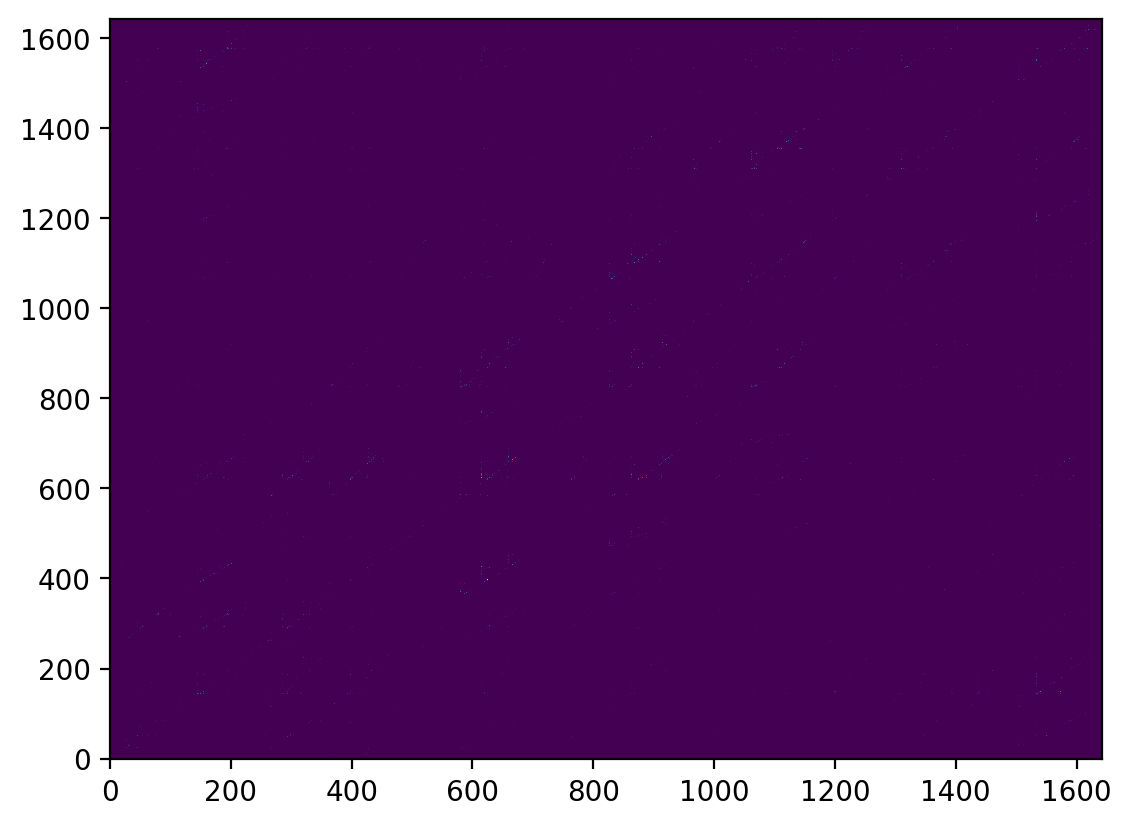

In [20]:
plt.pcolor(df)

In [21]:
class Skipgram:
    X_train = []
    y_train = []
    
    def __init__(self, d, window_size, alpha, epochs):
        self.d = d    # dimension of embedding vector
        self.window_size = window_size    # window_size
        self.alpha = alpha    # learning rate
        self.epochs = epochs
        
    def preprocessing(self, sentences):
        self.words = {}    # 모든 단어 dict
        # sentence : 1개의 곡(선율)
        for sentence in sentences:
            # word : 1개의 음표
            for word in sentence:
                if word not in self.words:
                    self.words[word] = 1
                else:
                    self.words[word] += 1

        self.n = len(self.words)   # n : 모든 단어(음표)의 수
        self.words = sorted(list(self.words.keys()))
        self.word_dict = {word : i for i,word in enumerate(self.words)}

        for sentence in sentences:
            for i in range(len(sentence)):
                # 원핫인코딩
                center_word = np.zeros(self.n)
                center_word[self.word_dict[sentence[i]]] = 1
                context = np.zeros(self.n)
                for j in range(max(0, i-self.window_size), min(len(sentence)-1, i+self.window_size)):
                    context[self.word_dict[sentence[j]]] += 1
                self.X_train.append(center_word)
                self.y_train.append(context)
        
    def feedforward(self, X):
        self.h = np.dot(self.W1.T,X)
        self.u = np.dot(self.W2.T,self.h)
        self.y = softmax(self.u)
        return self.y
    
    def backpropagate(self,x,t):
        error_mat = np.zeros((int(t.sum()), self.n))
        for i, context_note in enumerate(np.where(t)[0]):
            y_true = np.zeros(self.n)
            y_true[context_note] = 1
            error = self.y - y_true
            error_mat[i] = error.T
        dedw2 = np.zeros(self.W2.shape)
        ei = error_mat.sum(axis=0)
        for i in range(self.d):
            for j in range(self.n):
                dedw2[i][j] = ei[j] * self.h[i]
        eh = ei*self.W2
        self.W2 -= self.alpha*dedw2
        self.W1 -= self.alpha*eh.T
        
    def fit(self, sentences):
        self.preprocessing(sentences)
        self.W1 = np.random.uniform(-0.8, 0.8, (self.n, self.d))
        self.W2 = np.random.uniform(-0.8, 0.8, (self.d, self.n))
        self.prevloss = int(1e9)
        for epoch in range(self.epochs):
            self.loss = 0
            for j in range(len(self.X_train)):
                self.feedforward(self.X_train[j])
                self.backpropagate(self.X_train[j],self.y_train[j])
                for m in np.where(self.y_train[j])[0]:
                    self.loss += -1*self.u[m]
                self.loss += int(self.y_train[j].sum())*np.log(np.sum(np.exp(self.u)))
            print("epoch ", epoch+1, " loss = ",self.loss)
            if self.loss > self.prevloss:
                print("Callback executed")
                break
            self.alpha *= 1/(1+self.alpha*epoch)
        
    def predict(self,word,number_of_predictions):
        if word in self.words:
            index = self.word_dict[word]
            X = [0 for i in range(self.n)]
            X[index] = 1
            prediction = self.feedforward(X)
            output = {}
            for i in range(self.n):
                output[prediction[i]] = i

            top_context_words = []
            for k in sorted(output,reverse=True):
                top_context_words.append(self.words[output[k]])
                if(len(top_context_words)>=number_of_predictions):
                    break

            return top_context_words
        else:
            print("Word not found in dictionary")

In [22]:
sg = Skipgram(4, 2, 0.001, 80)
sg.fit(beethoven_list)

epoch  1  loss =  706832.7382257548
epoch  2  loss =  700179.3932101848
epoch  3  loss =  695846.124684613
epoch  4  loss =  693467.735721661
epoch  5  loss =  691202.1333482307
epoch  6  loss =  688975.7156357623
epoch  7  loss =  686431.9743626103
epoch  8  loss =  683381.3214084036
epoch  9  loss =  679914.5575548513
epoch  10  loss =  676112.9754536909
epoch  11  loss =  672162.7127964091
epoch  12  loss =  668211.3569306773
epoch  13  loss =  664378.2520621466
epoch  14  loss =  660773.4058518918
epoch  15  loss =  657441.4224418389
epoch  16  loss =  654381.5280080892
epoch  17  loss =  651582.213507417
epoch  18  loss =  649034.8193565722
epoch  19  loss =  646728.8927319044
epoch  20  loss =  644649.1928335082
epoch  21  loss =  642777.6976404242
epoch  22  loss =  641095.8671902166
epoch  23  loss =  639585.3997731841
epoch  24  loss =  638228.4664105633
epoch  25  loss =  637008.1889656456
epoch  26  loss =  635909.0121603061
epoch  27  loss =  634916.8045614922
epoch  28  lo

In [24]:
print(sg.predict(('C4', 1.0),10))
print(sg.predict(('C4', 2.0),10)) #2
print(sg.predict(('B4', 3.0),10)) #3
print(sg.predict(('C5', 3.5),10)) #3

print(sg.predict(('G4', 1.0),10)) #6
print(sg.predict(('C5', 2.5),10)) #4
print(sg.predict(('B4', 2.75),10)) #3
print(sg.predict(('A4', 3.0),10)) #6

print(sg.predict(('G4', 1.0),10)) #4
print(sg.predict(('G4', 2.0),10)) #6
print(sg.predict(('C5', 2.5),10)) #1
print(sg.predict(('B4', 2.75),10)) #3
print(sg.predict(('A4', 3.0),10)) #6
print(sg.predict(('F5', 3.5),10)) #9

print(sg.predict(('A4', 1.0),10))  #1

[('C4', 1.0), ('D4', 2.5), ('C4', 2.0), ('D4', 1.5), ('C4', 2.5), ('B3', 2.0), ('C4', 1.25), ('B3', 2.75), ('E4', 1.5), ('C4', 1.5)]
[('C4', 2.0), ('B3', 2.0), ('C4', 2.25), ('D4', 2.5), ('A3', 1.5), ('B3', 1.75), ('A3', 1.75), ('B3', 2.25), ('B-3', 2.25), ('D4', 1.75)]
[('C5', 2.0), ('C5', 1.0), ('A4', 2.5), ('G4', 1.0), ('D5', 2.5), ('G4', 2.75), ('G4', 2.0), ('A4', 1.5), ('C5', 2.75), ('D5', 1.0)]
[('G4', 2.0), ('A4', 2.5), ('A4', 1.5), ('G4', 1.0), ('G4', 2.75), ('G4', 2.5), ('C5', 2.0), ('C5', 1.0), ('G4', 2.25), ('G4', 1.75)]
[('G4', 1.0), ('C5', 2.0), ('A4', 2.5), ('G4', 2.75), ('A4', 1.5), ('G4', 2.0), ('C5', 1.0), ('D5', 2.5), ('G4', 2.25), ('G4', 2.5)]
[('D5', 2.5), ('D5', 1.0), ('F5', 2.0), ('F5', 1.0), ('C5', 2.75), ('E5', 1.0), ('G5', 1.0), ('F5', 2.5), ('C5', 2.5), ('E5', 2.0)]
[('C5', 2.0), ('E4', 1.0), ('A4', 1.0), ('B-4', 1.0), ('C5', 1.0), ('G5', 2.0), ('C5', 1.5), ('A4', 2.0), ('A4', 2.5), ('F4', 2.0)]
[('C5', 2.0), ('A4', 2.5), ('A4', 1.5), ('G4', 2.75), ('G4', 2.0)

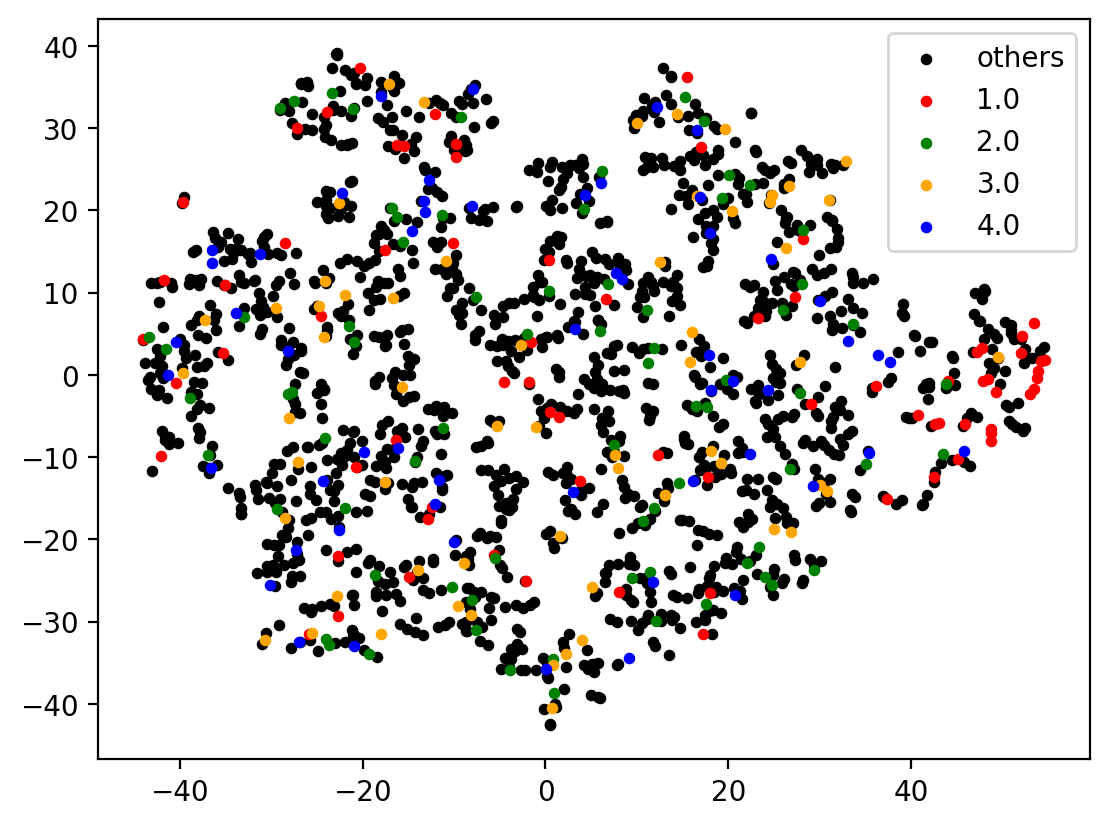

In [25]:
# plot embedded matrix and color points with respect to beat

N = len(df.columns)
beats = ['others','1.0','2.0','3.0','4.0']
labels = np.zeros(N)
for i in range(N):
    if '1.0' in df.columns[i]:
        labels[i] = 1
    if '2.0' in df.columns[i]:
        labels[i] = 2
    if '3.0' in df.columns[i]:
        labels[i] = 3
    if '4.0' in df.columns[i]:
        labels[i] = 4

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

cdict = {0: 'black', 1:'red', 2: 'green', 3:'orange', 4:'blue'}

model = TSNE()
transformed = model.fit_transform(sg.W1)

xs = transformed[:,0]
ys = transformed[:,1]
fig, ax = plt.subplots()
for g in np.unique(labels):
    ix = np.where(labels == g)
    ax.scatter(xs[ix], ys[ix], c = cdict[g], label = beats[int(g)], s = 10)
ax.legend()
plt.show()

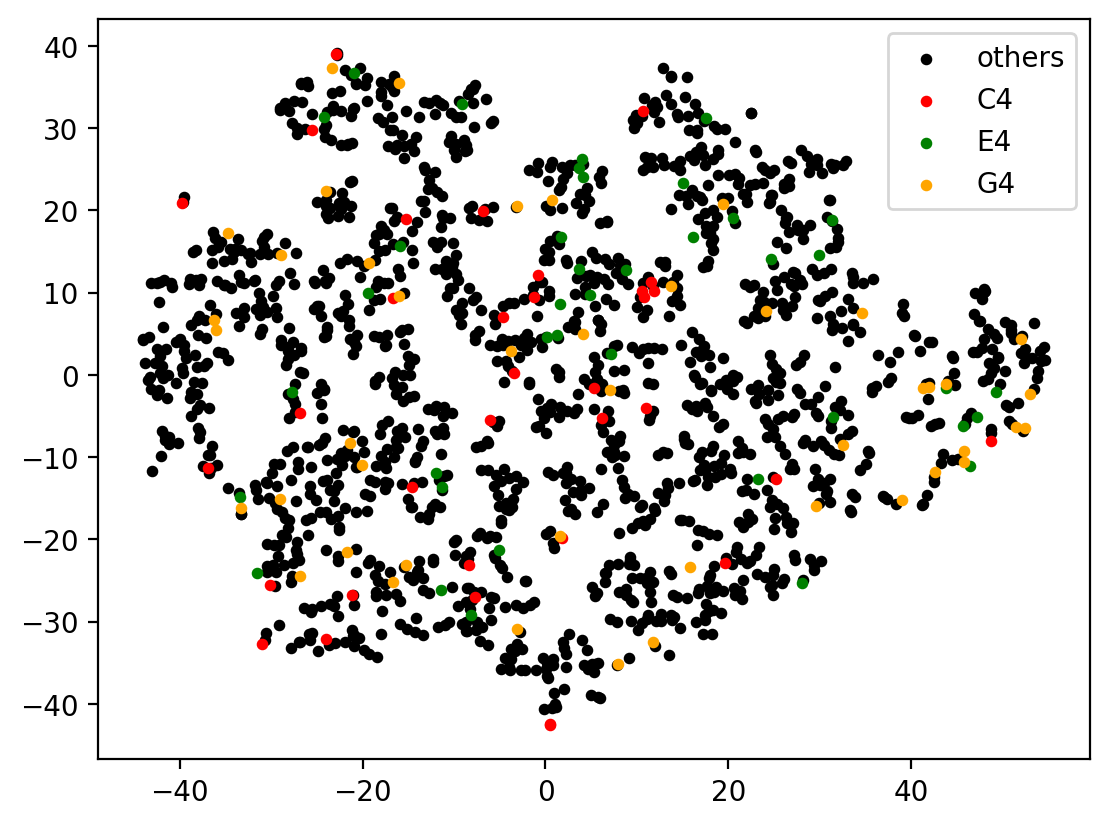

In [26]:
# plot embedded matrix and color points with respect to pitch


labels = np.zeros(N)
tonics = ['others','C4','E4','G4']
for i in range(N):
    if 'C4' in df.columns[i]:
        labels[i] = 1
    if 'E4' in df.columns[i]:
        labels[i] = 2
    if 'G4' in df.columns[i]:
        labels[i] = 3

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

cdict = {0: 'black', 1:'red', 2: 'green', 3:'orange', 4:'blue'}

model = TSNE()
transformed = model.fit_transform(sg.W1)

xs = transformed[:,0]
ys = transformed[:,1]
fig, ax = plt.subplots()
for g in np.unique(labels):
    ix = np.where(labels == g)
    ax.scatter(xs[ix], ys[ix], c = cdict[g], label = tonics[int(g)], s = 10)
ax.legend()
plt.show()